
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [36]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [92]:
# Load the file as a dataframe 
df = pd.read_csv('train.csv')
movies = pd.read_csv('moviesData.csv')

In [38]:
# Print the first ten rows of df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [39]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'].head()

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [40]:
# Find the details of MonthlyRate 
df['MonthlyRate'].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [61]:
# Check for missing values 
data= df.isnull().sum()
k=0
for i,j in enumerate(data):
    if j!=0:
        k=1
        print(data.index[i])
if k==0:
    print("No column with any missing value")
# Drop the missing values 
df=df.dropna()

# Print the size of df after dropping 

print(df.shape)

No column with any missing value
(1028, 35)


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [62]:
# Add a column named MonthRateNew 

df['MonthRateNew'] = (df['MonthlyRate'] - df['MonthlyRate'].mean() ) / (df['MonthlyRate']).std()


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [93]:
# Check for missing values 
missing=movies.isnull().sum()
#print(missing)
# Drop the missing values 
movies_dropped=movies.dropna()
print("Size after dropping null values:", movies_dropped.shape)

# Replace the missing values 
columns=[]
print("\nThe list of columns having null values:")
for i,j in enumerate(missing):
    if j!=0:
        columns.append(missing.index[i])

print(columns) 

movies.fillna(movies.mean(),inplace=True)

miss=movies.isnull().sum()

columns=[]

for i,j in enumerate(miss):
    if j!=0:
        columns.append(miss.index[i])
# You can use SimpleImputer of sklearn for this
for column in columns:
    movies[column].fillna("Not Known", inplace = True) 

print("Size after replacing null values instead of removing them " , movies.shape)

Size after dropping null values: (572, 31)

The list of columns having null values:
['runtime', 'studio', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5']
Size after replacing null values instead of removing them  (600, 31)


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

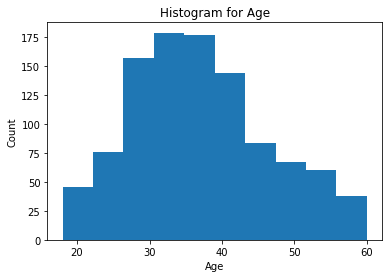

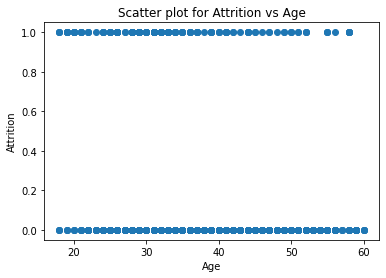

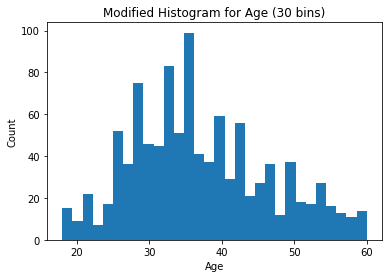

In [105]:
# Plot and modify the histogram of Age
plt.hist(df.Age)
plt.title("Histogram for Age")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()
# Draw a scatter plot between Age and Attrition
plt.scatter(df.Age,df.Attrition)
plt.ylabel("Attrition")
plt.xlabel("Age")
plt.title("Scatter plot for Attrition vs Age")
plt.show()

plt.hist(df.Age,bins=30)
plt.title("Modified Histogram for Age (30 bins)")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


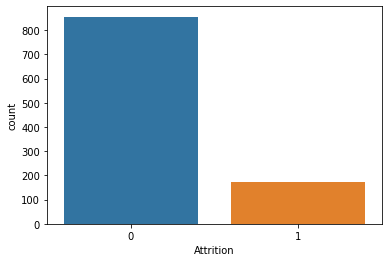

In [111]:
# Get a series of counts of values of Attrition

values=df.Attrition.value_counts()
print(values)
sns.countplot(x='Attrition',data=df)
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 



### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

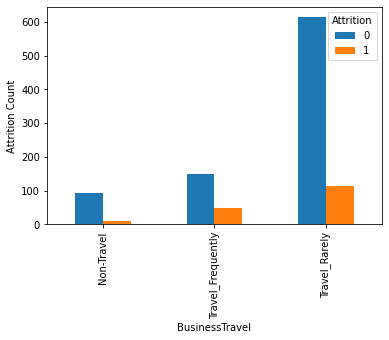

As evident from the graph , Travel_Rarely has the highest number of attrition


In [120]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')
plt.ylabel('Attrition Count')
plt.show()
print("As evident from the graph , Travel_Rarely has the highest number of attrition")

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Text(0, 0.5, 'Attrition Count')

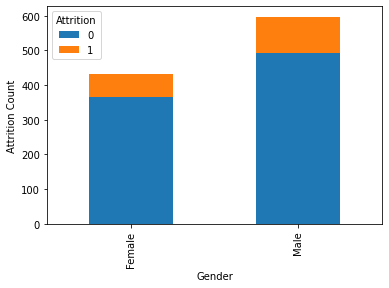

In [116]:
# Draw a stacked bar chart between Attrition and Gender 
table=pd.crosstab(df.Gender,df.Attrition).plot(kind='bar',stacked=True)
plt.ylabel('Attrition Count')


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

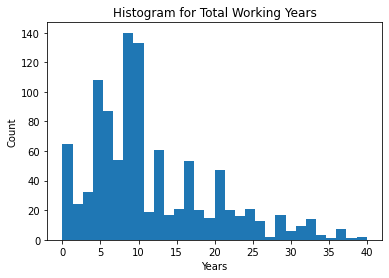

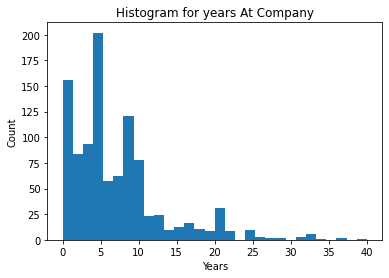

The values for total years at company are skewed to the left 


In [119]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears,bins=30)
plt.title("Histogram for Total Working Years")
plt.ylabel("Count")
plt.xlabel("Years")
plt.show()

# Draw a histogram of YearsAtCompany

plt.hist(df.YearsAtCompany,bins=30)
plt.title("Histogram for years At Company")
plt.ylabel("Count")
plt.xlabel("Years")
plt.show()

print("The values for total years at company are skewed to the left ")

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


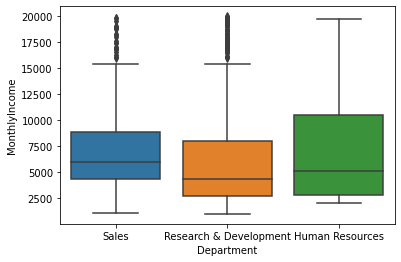

In [121]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 

sns.boxplot('Department', 'MonthlyIncome', data=df)


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

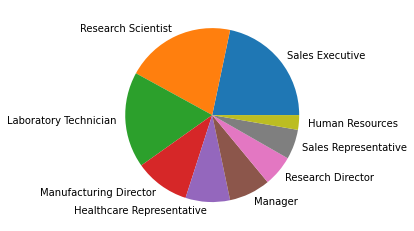

In [122]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
counts=df.JobRole.value_counts()

# plt.pie(Role_counts, labels=Role_counts)
plt.pie(counts, labels=counts.index.tolist())
plt.show()

